# Maximizing Revenue 

## Objective
To fine the relationship of the revenue with the payment method used.

## Methodology
<ol type="a">
    <li>The use of descriptive statistics and hypothesis testing to find the effect of the fare used.</li>
    <li>Gather insights relative to the fares used whether with the credit cards or by hand payment i.e., with cash.</li>
</ol>

## Research questions
* Is there a relationship between total fare amount and payment type?
* Can we nudge customers towards payment methods that yield higher revenue for drivers, without negatively impacting customer experience?

## Importing the necessary python libraries

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm
from warnings import filterwarnings

filterwarnings('ignore')

## Reading the dataset

In [4]:
df = pd.read_csv('data/yellow_tripdata_2020-01.csv')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


## EDA (Exploratory Data Analysis)

### Giving correct dtypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB


In [6]:
df.select_dtypes(include='object')

,tpep_pickup_datetime,tpep_dropoff_datetime,store_and_fwd_flag
0,2020-01-01 00:28:15,2020-01-01 00:33:03,N
1,2020-01-01 00:35:39,2020-01-01 00:43:04,N
2,2020-01-01 00:47:41,2020-01-01 00:53:52,N
3,2020-01-01 00:55:23,2020-01-01 01:00:14,N
4,2020-01-01 00:01:58,2020-01-01 00:04:16,N
...,...,...,...
6405003,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN
6405004,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN
6405005,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN
6405006,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN


In [7]:
type_mappings = {
    'tpep_pickup_datetime': 'datetime64[ns]',
    'tpep_dropoff_datetime': 'datetime64[ns]',
    'store_and_fwd_flag': 'string',
}
df = df.astype(type_mappings)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     string        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
dtypes: datetime64[ns](2), 

### Filling `NaN`

In [8]:
df.isna().sum()

VendorID                 65441
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65441
trip_distance                0
RatecodeID               65441
store_and_fwd_flag       65441
PULocationID                 0
DOLocationID                 0
payment_type             65441
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

In [9]:
df['VendorID'].value_counts()

VendorID
2.0    4245128
1.0    2094439
Name: count, dtype: int64

In [10]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [11]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag       string[python]
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [12]:
# Fill NaN with the mode (most frequent value)
df['VendorID'].fillna(df['VendorID'].mode()[0], inplace=True)
df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)
df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace=True)
df['payment_type'].fillna(df['payment_type'].mode()[0], inplace=True)

df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,2.0,2020-01-31 22:51:00,2020-01-31 23:22:00,1.0,3.24,1.0,N,237,234,1.0,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,2.0,2020-01-31 22:10:00,2020-01-31 23:26:00,1.0,22.13,1.0,N,259,45,1.0,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,2.0,2020-01-31 22:50:07,2020-01-31 23:17:57,1.0,10.51,1.0,N,137,169,1.0,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,2.0,2020-01-31 22:25:53,2020-01-31 22:48:32,1.0,5.49,1.0,N,50,42,1.0,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


### Getting the correlated columns for `fare_amount`

In [13]:
fare_amount_cov_df = df.select_dtypes(include=np.number).corr()[['fare_amount']]
influential_cols = fare_amount_cov_df[fare_amount_cov_df > -0.0][fare_amount_cov_df < 1.].dropna().sort_values(by='fare_amount', ascending=False).index.to_list()
influential_cols

['total_amount',
 'tip_amount',
 'tolls_amount',
 'RatecodeID',
 'improvement_surcharge',
 'trip_distance',
 'VendorID']

### Dropping duplicates

In [14]:
df.drop_duplicates(inplace = True)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,2.0,2020-01-31 22:51:00,2020-01-31 23:22:00,1.0,3.24,1.0,N,237,234,1.0,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,2.0,2020-01-31 22:10:00,2020-01-31 23:26:00,1.0,22.13,1.0,N,259,45,1.0,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,2.0,2020-01-31 22:50:07,2020-01-31 23:17:57,1.0,10.51,1.0,N,137,169,1.0,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,2.0,2020-01-31 22:25:53,2020-01-31 22:48:32,1.0,5.49,1.0,N,50,42,1.0,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


In [15]:
df.shape

(6392059, 18)

### Acquiring `duration`

In [16]:
df['duration_minutes'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/60
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration_minutes
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,0 days 00:00:04.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,0 days 00:00:07.416666666
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,0 days 00:00:06.183333333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,0 days 00:00:04.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,0 days 00:00:02.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,2.0,2020-01-31 22:51:00,2020-01-31 23:22:00,1.0,3.24,1.0,N,237,234,1.0,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,0 days 00:00:31
6405004,2.0,2020-01-31 22:10:00,2020-01-31 23:26:00,1.0,22.13,1.0,N,259,45,1.0,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,0 days 00:01:16
6405005,2.0,2020-01-31 22:50:07,2020-01-31 23:17:57,1.0,10.51,1.0,N,137,169,1.0,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,0 days 00:00:27.833333333
6405006,2.0,2020-01-31 22:25:53,2020-01-31 22:48:32,1.0,5.49,1.0,N,50,42,1.0,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,0 days 00:00:22.650000


### Getting contributions 0f the passenger amount and payment type

In [17]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1.0    0.719599
2.0    0.148062
3.0    0.039148
5.0    0.035308
6.0    0.020675
4.0    0.019316
0.0    0.017882
7.0    0.000005
9.0    0.000003
8.0    0.000003
Name: proportion, dtype: float64

In [18]:
df['payment_type'].value_counts(normalize=True)

payment_type
1.0    7.427011e-01
2.0    2.493459e-01
3.0    5.126674e-03
4.0    2.826163e-03
5.0    1.564441e-07
Name: proportion, dtype: float64

#### Getting passenger count < 6 and payment type only 1 & 2 

In [19]:
df = df[(df['passenger_count'] < 6) & (df['passenger_count'] > 0)]
df = df[df['payment_type'] < 3]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration_minutes
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,0 days 00:00:04.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,0 days 00:00:07.416666666
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,0 days 00:00:06.183333333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,0 days 00:00:04.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,0 days 00:00:02.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,2.0,2020-01-31 22:51:00,2020-01-31 23:22:00,1.0,3.24,1.0,N,237,234,1.0,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,0 days 00:00:31
6405004,2.0,2020-01-31 22:10:00,2020-01-31 23:26:00,1.0,22.13,1.0,N,259,45,1.0,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,0 days 00:01:16
6405005,2.0,2020-01-31 22:50:07,2020-01-31 23:17:57,1.0,10.51,1.0,N,137,169,1.0,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,0 days 00:00:27.833333333
6405006,2.0,2020-01-31 22:25:53,2020-01-31 22:48:32,1.0,5.49,1.0,N,50,42,1.0,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,0 days 00:00:22.650000


In [20]:
df.shape

(6097509, 19)

In [21]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration_minutes
count,6.097509e+06,6097509,6097509,6.097509e+06,6.097509e+06,6.097509e+06,6.097509e+06,6.097509e+06,6.097509e+06,6.097509e+06,6.097509e+06,6.097509e+06,6.097509e+06,6.097509e+06,6.097509e+06,6.097509e+06,6.097509e+06,6097509
mean,1.680644e+00,2020-01-17 03:29:14.150761728,2020-01-17 03:45:11.122809088,1.443529e+00,2.928874e+00,1.057002e+00,1.648538e+02,1.627624e+02,1.251139e+00,1.272871e+01,1.098706e+00,4.951048e-01,2.211386e+00,3.478805e-01,2.994663e-01,1.873804e+01,2.292411e+00,0 days 00:00:15.949534118
min,1.000000e+00,2003-01-01 00:07:17,2003-01-01 14:16:59,1.000000e+00,-3.062000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-5.000000e+02,-2.700000e+01,-5.000000e-01,-9.100000e+01,-1.975000e+01,-3.000000e-01,-5.003000e+02,-2.500000e+00,-1 days +23:13:49.633333334
25%,1.000000e+00,2020-01-09 17:34:25,2020-01-09 17:50:50,1.000000e+00,9.700000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00,0 days 00:00:06.400000
50%,2.000000e+00,2020-01-16 23:54:48,2020-01-17 00:10:13,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00,0 days 00:00:10.500000
75%,2.000000e+00,2020-01-24 18:37:40,2020-01-24 18:53:13,2.000000e+00,2.920000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.980000e+01,2.500000e+00,0 days 00:00:16.833333333
max,2.000000e+00,2021-01-02 01:12:10,2021-01-02 01:25:01,5.000000e+00,2.102401e+05,9.900000e+01,2.650000e+02,2.650000e+02,2.000000e+00,4.265000e+03,1.130100e+02,3.080000e+01,1.100000e+03,8.535500e+02,3.000000e-01,4.268300e+03,2.750000e+00,0 days 02:22:05.116666666
std,4.662272e-01,NaN,NaN,9.444155e-01,8.522527e+01,7.303326e-01,6.552393e+01,6.989000e+01,4.336686e-01,1.201376e+01,1.250120e+00,5.368665e-02,2.757830e+00,1.688260e+00,1.633084e-02,1.463067e+01,6.942617e-01,0 days 00:01:03.126693399


In [22]:
df['payment_type'].replace([1.0, 2.0], ['Card', 'Cash'], inplace=True)

In [23]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration_minutes
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,Card,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,0 days 00:00:04.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,Card,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,0 days 00:00:07.416666666
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,Card,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,0 days 00:00:06.183333333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,Card,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,0 days 00:00:04.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,Cash,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,0 days 00:00:02.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,2.0,2020-01-31 22:51:00,2020-01-31 23:22:00,1.0,3.24,1.0,N,237,234,Card,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,0 days 00:00:31
6405004,2.0,2020-01-31 22:10:00,2020-01-31 23:26:00,1.0,22.13,1.0,N,259,45,Card,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,0 days 00:01:16
6405005,2.0,2020-01-31 22:50:07,2020-01-31 23:17:57,1.0,10.51,1.0,N,137,169,Card,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,0 days 00:00:27.833333333
6405006,2.0,2020-01-31 22:25:53,2020-01-31 22:48:32,1.0,5.49,1.0,N,50,42,Card,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,0 days 00:00:22.650000


### Making a separate dataframe for the revenue related statistics

In [24]:
df_revenue = df[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration_minutes']]
df_revenue

,passenger_count,payment_type,fare_amount,trip_distance,duration_minutes
0,1.0,Card,6.00,1.20,0 days 00:00:04.800000
1,1.0,Card,7.00,1.20,0 days 00:00:07.416666666
2,1.0,Card,6.00,0.60,0 days 00:00:06.183333333
3,1.0,Card,5.50,0.80,0 days 00:00:04.850000
4,1.0,Cash,3.50,0.00,0 days 00:00:02.300000
...,...,...,...,...,...
6405003,1.0,Card,17.59,3.24,0 days 00:00:31
6405004,1.0,Card,46.67,22.13,0 days 00:01:16
6405005,1.0,Card,48.85,10.51,0 days 00:00:27.833333333
6405006,1.0,Card,27.17,5.49,0 days 00:00:22.650000


### Removing outliers

#### Removing negative values

In [25]:
df_revenue.describe()

,passenger_count,fare_amount,trip_distance,duration_minutes
count,6.097509e+06,6.097509e+06,6.097509e+06,6097509
mean,1.443529e+00,1.272871e+01,2.928874e+00,0 days 00:00:15.949534118
std,9.444155e-01,1.201376e+01,8.522527e+01,0 days 00:01:03.126693399
min,1.000000e+00,-5.000000e+02,-3.062000e+01,-1 days +23:13:49.633333334
25%,1.000000e+00,6.500000e+00,9.700000e-01,0 days 00:00:06.400000
50%,1.000000e+00,9.000000e+00,1.600000e+00,0 days 00:00:10.500000
75%,2.000000e+00,1.400000e+01,2.920000e+00,0 days 00:00:16.833333333
max,5.000000e+00,4.265000e+03,2.102401e+05,0 days 02:22:05.116666666


In [26]:
df_revenue = df_revenue[df_revenue['fare_amount'] > 0]
df_revenue = df_revenue[df_revenue['trip_distance'] > 0]
df_revenue = df_revenue[df_revenue['duration_minutes'].dt.total_seconds()/3600 > 0]
df_revenue

,passenger_count,payment_type,fare_amount,trip_distance,duration_minutes
0,1.0,Card,6.00,1.20,0 days 00:00:04.800000
1,1.0,Card,7.00,1.20,0 days 00:00:07.416666666
2,1.0,Card,6.00,0.60,0 days 00:00:06.183333333
3,1.0,Card,5.50,0.80,0 days 00:00:04.850000
5,1.0,Cash,2.50,0.03,0 days 00:00:00.883333333
...,...,...,...,...,...
6405003,1.0,Card,17.59,3.24,0 days 00:00:31
6405004,1.0,Card,46.67,22.13,0 days 00:01:16
6405005,1.0,Card,48.85,10.51,0 days 00:00:27.833333333
6405006,1.0,Card,27.17,5.49,0 days 00:00:22.650000


In [27]:
df_revenue.shape

(6032815, 5)

In [28]:
df_revenue.rename(columns={'duration_minutes': 'duration'}, inplace=True)
df_revenue.describe()

,passenger_count,fare_amount,trip_distance,duration
count,6.032815e+06,6.032815e+06,6.032815e+06,6032815
mean,1.445548e+00,1.256746e+01,2.960275e+00,0 days 00:00:15.984631386
std,9.465151e-01,1.144257e+01,8.568011e+01,0 days 00:01:03.181936556
min,1.000000e+00,1.000000e-02,1.000000e-02,0 days 00:00:00.016666666
25%,1.000000e+00,6.500000e+00,9.900000e-01,0 days 00:00:06.466666666
50%,1.000000e+00,9.000000e+00,1.610000e+00,0 days 00:00:10.533333333
75%,2.000000e+00,1.350000e+01,2.960000e+00,0 days 00:00:16.833333333
max,5.000000e+00,4.265000e+03,2.102401e+05,0 days 02:22:05.116666666


#### Removing maximum and minimum outliers

In [29]:
df_revenue.dtypes

passenger_count            float64
payment_type                object
fare_amount                float64
trip_distance              float64
duration           timedelta64[ns]
dtype: object

In [30]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    if col in df_revenue.columns:  # Ensure the column exists in df_revenue
        q_25 = df_revenue[col].quantile(0.25)
        q_75 = df_revenue[col].quantile(0.75)
        IQR = q_75 - q_25  # Fix the IQR calculation

        lower_bound = q_25 - 1.5 * IQR
        upper_bound = q_75 + 1.5 * IQR

        # Apply the filtering (removing outliers based on IQR)
        df_revenue = df_revenue[(df_revenue[col] >= lower_bound) & (df_revenue[col] <= upper_bound)]

In [31]:
df_revenue

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,Card,6.00,1.20,0 days 00:00:04.800000
1,1.0,Card,7.00,1.20,0 days 00:00:07.416666666
2,1.0,Card,6.00,0.60,0 days 00:00:06.183333333
3,1.0,Card,5.50,0.80,0 days 00:00:04.850000
5,1.0,Cash,2.50,0.03,0 days 00:00:00.883333333
...,...,...,...,...,...
6404974,1.0,Card,13.88,0.41,0 days 00:00:03.983333333
6404986,1.0,Card,21.95,2.90,0 days 00:00:18
6404988,1.0,Card,17.83,4.32,0 days 00:00:23
6405000,1.0,Card,19.56,2.70,0 days 00:00:14


### Data visualizations

#### Visualizing fare amount and trip distance w.r.t payment type 

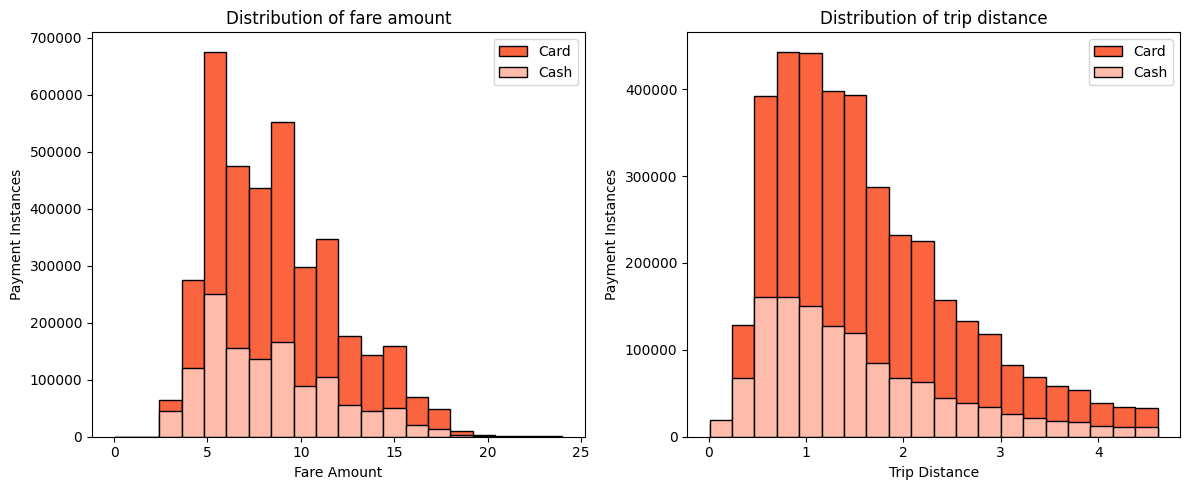

In [32]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df_revenue[df_revenue['payment_type'] == 'Card']['fare_amount'], bins=20, histtype='barstacked', edgecolor='k', color='#FA643F', label='Card')
plt.hist(df_revenue[df_revenue['payment_type'] == 'Cash']['fare_amount'], bins=20, histtype='barstacked', edgecolor='k', color='#FFBCAB', label='Cash')
plt.ylabel('Payment Instances')
plt.xlabel('Fare Amount')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(df_revenue[df_revenue['payment_type'] == 'Card']['trip_distance'], bins=20, histtype='barstacked', edgecolor='k', color='#FA643F', label='Card')
plt.hist(df_revenue[df_revenue['payment_type'] == 'Cash']['trip_distance'], bins=20, histtype='barstacked', edgecolor='k', color='#FFBCAB', label='Cash')
plt.ylabel('Payment Instances')
plt.xlabel('Trip Distance')
plt.legend()

plt.tight_layout()

plt.show()

In [33]:
df_revenue.groupby(by='payment_type').agg({'trip_distance':['mean', 'std', 'var'], 'fare_amount': ['mean', 'std', 'var']})

trip_distance                     fare_amount            \
                      mean       std       var        mean       std   
payment_type                                                           
Card              1.631058  0.934833  0.873912    8.716817  3.362503   
Cash              1.523037  0.953370  0.908915    8.316673  3.386812   

                         
                    var  
payment_type             
Card          11.306429  
Cash          11.470495

#### Visualizing the cash and card payments percentages

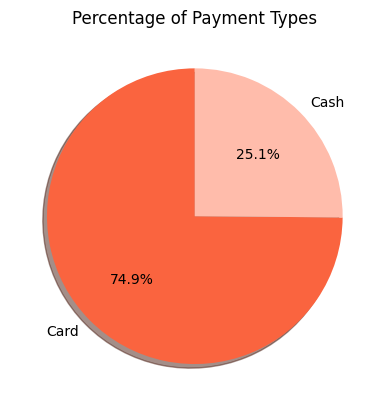

In [34]:
plt.title('Percentage of Payment Types')
plt.pie(df_revenue['payment_type'].value_counts(normalize = True), labels=df_revenue['payment_type'].value_counts(normalize = True).index,
        startangle=90, shadow=True, autopct='%1.1f%%', colors=['#FA643F', '#FFBCAB'])
plt.show()

#### Visualizing the passenger count and their payment criteria

In [35]:
passenger_payments = df_revenue.groupby(by=['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_payments.rename(columns = {'passenger_count': 'payment_type_count'}, inplace=True)
passenger_payments.reset_index(inplace=True)
passenger_payments

,payment_type,passenger_count,payment_type_count
0,Card,1.0,2818203
1,Card,2.0,562197
2,Card,3.0,147883
3,Card,4.0,67516
4,Card,5.0,139479
5,Cash,1.0,911985
6,Cash,2.0,205523
7,Cash,3.0,57063
8,Cash,4.0,32513
9,Cash,5.0,46989


In [40]:
passenger_payments['payment_type_percentage'] = (passenger_payments['payment_type_count']/passenger_payments['payment_type_count'].sum())*100
passenger_payments

,payment_type,passenger_count,payment_type_count,payment_type_percentage
0,Card,1.0,2818203,56.484360
1,Card,2.0,562197,11.267938
2,Card,3.0,147883,2.963973
3,Card,4.0,67516,1.353202
4,Card,5.0,139479,2.795534
5,Cash,1.0,911985,18.278630
6,Cash,2.0,205523,4.119233
7,Cash,3.0,57063,1.143696
8,Cash,4.0,32513,0.651648
9,Cash,5.0,46989,0.941786


In [77]:
passenger_payments['passenger_count'] = passenger_payments['passenger_count'].astype('int64')
passenger_payments

,payment_type,passenger_count,payment_type_count,payment_type_percentage
0,Card,1,2818203,56.484360
1,Card,2,562197,11.267938
2,Card,3,147883,2.963973
3,Card,4,67516,1.353202
4,Card,5,139479,2.795534
5,Cash,1,911985,18.278630
6,Cash,2,205523,4.119233
7,Cash,3,57063,1.143696
8,Cash,4,32513,0.651648
9,Cash,5,46989,0.941786


In [84]:
cols = ['payment_type', 1,2,3,4,5]
payments_stats = pd.DataFrame(columns = cols)
payments_stats['payment_type'] = ['Card', 'Cash']
payments_stats.iloc[0,1:] = passenger_payments.iloc[0:5, -1]
payments_stats.iloc[1,1:] = passenger_payments.iloc[5:,-1]
payments_stats

,payment_type,1,2,3,4,5
0,Card,56.48436,11.267938,2.963973,1.353202,2.795534
1,Cash,18.27863,4.119233,1.143696,0.651648,0.941786


In [90]:
payments_stats = payments_stats.astype({
    'payment_type':'string',
    1: 'float64',
    2: 'float64',
    3: 'float64',
    4: 'float64',
    5: 'float64',
})
payments_stats

,payment_type,1,2,3,4,5
0,Card,56.48436,11.267938,2.963973,1.353202,2.795534
1,Cash,18.27863,4.119233,1.143696,0.651648,0.941786


In [96]:
colors=['#FA643F', '#FFBCAB']
stacked_colors = ['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F']
colors, stacked_colors

(['#FA643F', '#FFBCAB'],
 ['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'])

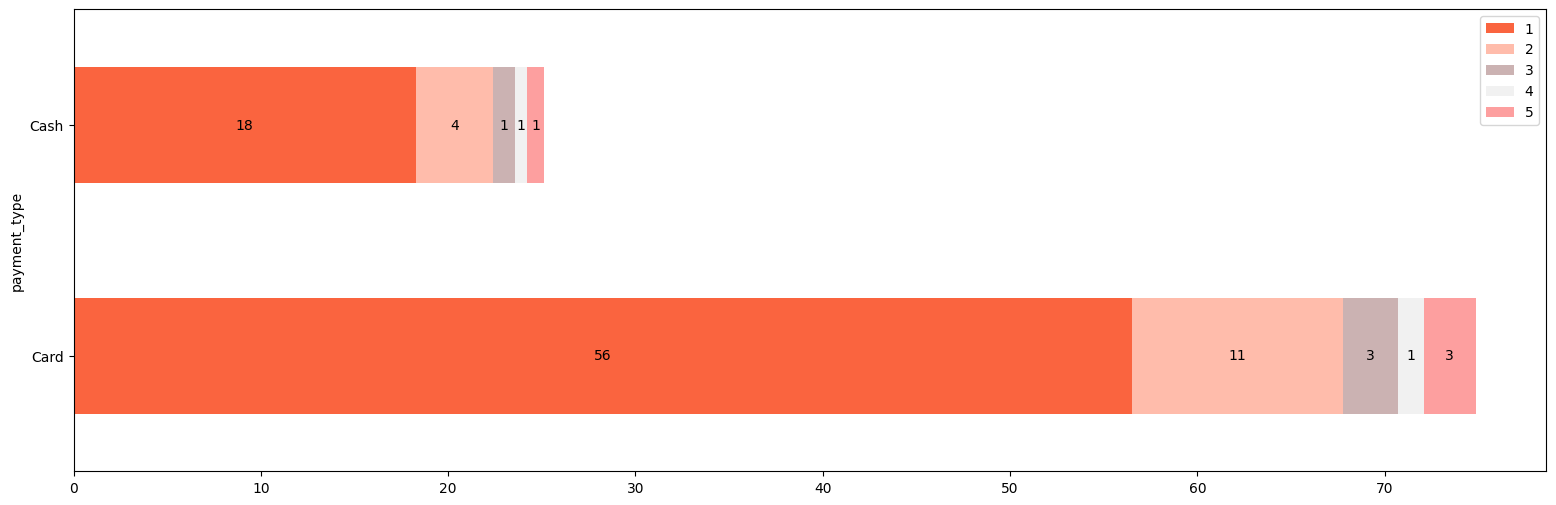

In [110]:
_, ax = plt.subplots(figsize=(19,6))
payments_stats.plot(kind='barh', x='payment_type', ax = ax, color = stacked_colors, stacked=True)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(
        x + width / 2,
        y + height / 2,
        '{:.00f}'.format(width),
        horizontalalignment='center',
        verticalalignment='center',
    )
plt.show()

#### Normality check of fare amount

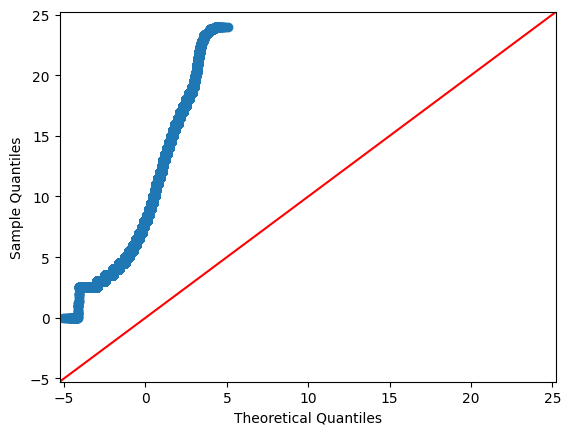

In [117]:
sm.qqplot(df_revenue['fare_amount'], line='45')
plt.show()

### Testing hypothesis

#### Hypotheses
* **Null hypothesis:** There's no difference between the cash and card payment for the acquired fare amount.
* **Alternate hypothesis:** There's a difference between the cash and card payment for the acquired fare amount.

#### Testing hypothesis

In [125]:
cash_payment_fare = df_revenue[df_revenue['payment_type'] == 'Cash']['fare_amount']
card_payment_fare = df_revenue[df_revenue['payment_type'] == 'Card']['fare_amount']

t_stats, p_value = st.ttest_ind(a=cash_payment_fare, b=card_payment_fare, equal_var=False)
t_stats, p_value

(-114.68540025898852, 0.0)

In [130]:
man_whitney_res = st.mannwhitneyu(x=cash_payment_fare.values, y=card_payment_fare.values)
man_whitney_res.statistic, man_whitney_res.pvalue

(2167199935467.0, 0.0)

#### Hypotheses testing with `ttest_ind` result
The result of your **t-test** produced two key values:

1. **T-statistic**: `-114.69` (rounded)
2. **P-value**: `0.0`

Here’s what they mean in the context of your hypothesis test:

#### 1. **T-statistic (-114.69)**:
   - The **t-statistic** measures how many standard deviations the difference between the two sample means is from zero. A very large absolute t-value (like -114.69) indicates a significant difference between the means of the two groups.
   - The negative sign simply indicates that the **mean fare amount** for cash payments is **lower** than the mean fare amount for card payments.
   - In this case, the t-statistic is extremely negative, implying a **very large difference** between the two groups (cash and card payments).

#### 2. **P-value (0.0)**:
   - The **p-value** represents the probability of observing such a large (or extreme) difference between the sample means if the null hypothesis were true.
   - A **p-value of 0.0** indicates that the likelihood of observing the difference between cash and card payments purely by chance is essentially zero. This means the difference is statistically significant.

#### Interpretation:

- **Null hypothesis (H₀)**: "There is no difference between the mean fare amounts of cash and card payments."
- **Alternative hypothesis (H₁)**: "There is a difference between the mean fare amounts of cash and card payments."

Since the **p-value is 0.0**, which is smaller than any typical significance level (e.g., 0.05 or 0.01), you would **reject the null hypothesis**.

This means:
- **There is a statistically significant difference between the mean fare amounts for cash and card payments**.
- Given the **negative t-statistic**, the result suggests that **cash payments tend to have lower fare amounts** than card payments.

### Practical Implication:
The **difference in means** between the fare amounts paid with cash versus card is statistically significant, and the test strongly suggests that customers paying with cash tend to have lower fare amounts compared to those paying with cards.

#### Hypothesis testing result with `mannwhitneyu`
The result obtained from the Mann-Whitney U test provides two key values:

1. **Test statistic**: `2167199935467.0`
2. **P-value**: `0.0`

Here’s what they mean in the context of your hypothesis test:

#### 1. **Test Statistic (2167199935467.0)**:
   - The test statistic is a measure of the rank-sum differences between the two groups (cash and card payments). It's a non-parametric test, so instead of comparing means directly, it compares the ranks of the values in both groups.
   - While the exact value of the test statistic isn't of primary interest for decision-making, its magnitude typically grows with larger datasets, and it plays a role in determining the p-value. In this case, the very large statistic suggests substantial differences in the ranks of fare amounts between the two groups.

#### 2. **P-value (0.0)**:
   - The p-value tells you how likely it is that you would observe the data (or something more extreme) if the **null hypothesis** were true.
   - A p-value of `0.0` essentially means that, given the data, the probability of observing the difference between cash and card payments purely by chance is **extremely low** (close to zero).

#### Interpreting the Results:
   - **Null hypothesis**: "There's no difference between cash and card payments for the acquired fare amount."
   - **Alternative hypothesis**: "There is a difference between cash and card payments for the acquired fare amount."

Since the **p-value is 0.0**, which is much smaller than any common significance level (e.g., 0.05 or 0.01), you **reject the null hypothesis**. This means:
   - There is strong evidence to conclude that there **is a statistically significant difference** between the fare amounts paid by cash and by card.

### Notes:
- As with the Mann-Whitney U test, you should consider the practical significance of this result, especially since the sample size is likely large, making it easier to detect statistically significant results even with small differences in fare amounts.
- You might also want to visualize the distributions or summary statistics (like the mean and standard deviation) for each payment type to gain more insights into the nature of the difference.

Both tests (Mann-Whitney and t-test) confirm a significant difference between cash and card payments, but the t-test gives you information specifically about the means of the two distributions.

In [131]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration_minutes
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,Card,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,0 days 00:00:04.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,Card,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,0 days 00:00:07.416666666
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,Card,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,0 days 00:00:06.183333333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,Card,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,0 days 00:00:04.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,Cash,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,0 days 00:00:02.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,2.0,2020-01-31 22:51:00,2020-01-31 23:22:00,1.0,3.24,1.0,N,237,234,Card,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,0 days 00:00:31
6405004,2.0,2020-01-31 22:10:00,2020-01-31 23:26:00,1.0,22.13,1.0,N,259,45,Card,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,0 days 00:01:16
6405005,2.0,2020-01-31 22:50:07,2020-01-31 23:17:57,1.0,10.51,1.0,N,137,169,Card,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,0 days 00:00:27.833333333
6405006,2.0,2020-01-31 22:25:53,2020-01-31 22:48:32,1.0,5.49,1.0,N,50,42,Card,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,0 days 00:00:22.650000


## Saving the cleaned dataset

In [133]:
df_revenue.to_csv('data/cleaned_yellow_tripdata_2020_01.csv')

In [1]:
cat data/cleaned_yellow_tripdata_2020_01.csv | head -n 100

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,Card,6.0,1.2,0 days 00:00:04.800000
1,1.0,Card,7.0,1.2,0 days 00:00:07.416666666
2,1.0,Card,6.0,0.6,0 days 00:00:06.183333333
3,1.0,Card,5.5,0.8,0 days 00:00:04.850000
5,1.0,Cash,2.5,0.03,0 days 00:00:00.883333333
9,2.0,Card,8.0,0.7,0 days 00:00:11.450000
10,2.0,Card,12.0,2.4,0 days 00:00:16.866666666
11,1.0,Cash,9.5,0.8,0 days 00:00:14.433333333
13,1.0,Card,6.0,1.07,0 days 00:00:05.616666666
15,3.0,Cash,9.0,1.6,0 days 00:00:11.516666666
16,1.0,Card,4.0,0.5,0 days 00:00:03.033333333
17,1.0,Cash,11.5,1.7,0 days 00:00:16.933333333
20,1.0,Card,9.5,1.5,0 days 00:00:13.100000
22,1.0,Card,10.5,1.9,0 days 00:00:14.866666666
23,1.0,Card,18.0,4.2,0 days 00:00:23.750000
24,2.0,Card,7.5,1.5,0 days 00:00:07.900000
25,1.0,Card,5.5,0.6,0 days 00:00:05.583333333
27,1.0,Card,9.0,2.12,0 days 00:00:09.683333333
28,2.0,Card,5.5,0.93,0 days 00:00:05.850000
30,1.0,Cash,6.5,1.2,0 days 00:00:06.333333333
31,1.0,Card,8.5,1.3,0 days 00:00:1

In [16]:
df_xls = pd.read_excel('data/cleaned_yellow_tripdata_2020_01.xlsx')
df_xls

,s.no,passenger_count,payment_type,fare_amount,trip_distance,duration
0,0,1,Card,6.0,1.20,0 days 00:00:04.800000
1,1,1,Card,7.0,1.20,0 days 00:00:07.416666666
2,2,1,Card,6.0,0.60,0 days 00:00:06.183333333
3,3,1,Card,5.5,0.80,0 days 00:00:04.850000
4,5,1,Cash,2.5,0.03,0 days 00:00:00.883333333
...,...,...,...,...,...,...
65530,90791,1,Card,6.5,1.13,0 days 00:00:05.900000
65531,90792,1,Card,13.0,3.94,0 days 00:00:13.083333333
65532,90793,1,Card,14.0,4.16,0 days 00:00:13.750000
65533,90795,1,Cash,15.0,4.40,0 days 00:00:10.566666666


In [17]:
df_xls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   s.no             65535 non-null  int64  
 1   passenger_count  65535 non-null  int64  
 2   payment_type     65535 non-null  object 
 3   fare_amount      65535 non-null  float64
 4   trip_distance    65535 non-null  float64
 5   duration         65535 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 3.0+ MB


| Platform     | Profile Link                                   |
|--------------|-----------------------------------------------|
| LinkedIn     | [Fawad Awan](https://linkedin.com/in//fawad-awan-893a58171) |
| GitHub       | [JackTheProgrammer](https://github.com/JackTheProgrammer)      |